Lade Top-Diagnosen...
Die Top 5 Diagnosen:


,icd9_code,short_title,long_title,frequency
0,4019,Hypertension NOS,Unspecified essential hypertension,20703
1,4280,CHF NOS,"Congestive heart failure, unspecified",13111
2,42731,Atrial fibrillation,Atrial fibrillation,12891
3,41401,Crnry athrscl natve vssl,Coronary atherosclerosis of native coronary ar...,12429
4,5849,Acute kidney failure NOS,"Acute kidney failure, unspecified",9119


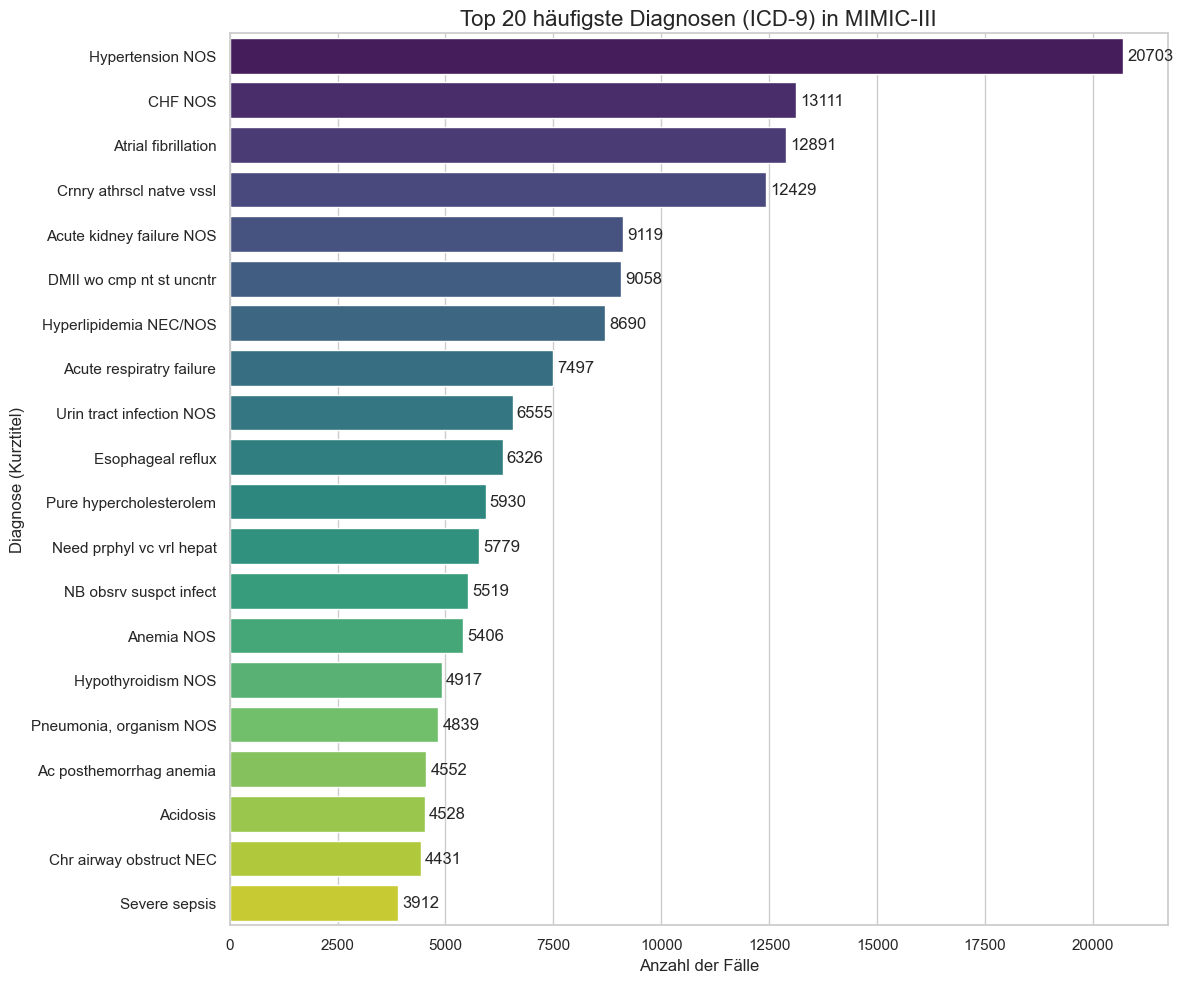

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Pfad zum src-Ordner setzen
sys.path.append(os.path.abspath('..'))
from src.db_connect import load_sql

# 1. Daten laden
print("Lade Top-Diagnosen...")
df_diag = load_sql('../sql/top_diagnosis.sql')

# 2. Kurzer Blick in die Daten
print("Die Top 5 Diagnosen:")
display(df_diag.head())

# 3. Professionelle Darstellung
plt.figure(figsize=(12, 10)) # Groß genug machen
sns.set_theme(style="whitegrid")

# Barplot erstellen
# y = Diagnose-Name, x = Häufigkeit
ax = sns.barplot(
    data=df_diag,
    y='short_title',
    x='frequency',
    palette='viridis', # Schöne Farbverläufe
    hue='short_title', # Verhindert Warnmeldungen neuerer Versionen
    legend=False
)

# Titel und Label
plt.title('Top 20 häufigste Diagnosen (ICD-9) in MIMIC-III', fontsize=16)
plt.xlabel('Anzahl der Fälle', fontsize=12)
plt.ylabel('Diagnose (Kurztitel)', fontsize=12)

# Werte direkt an die Balken schreiben (für bessere Lesbarkeit)
for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

Analysiere potenzielle Kohorten...


,disease_group,num_patients,mortality_rate_percent
0,Herzinsuffizienz (CHF),20676,13.13
1,Akutes Nierenversagen (AKI),11467,22.20
2,GI Blutung,2515,19.60
3,Hirnblutung/Stroke,2025,29.23


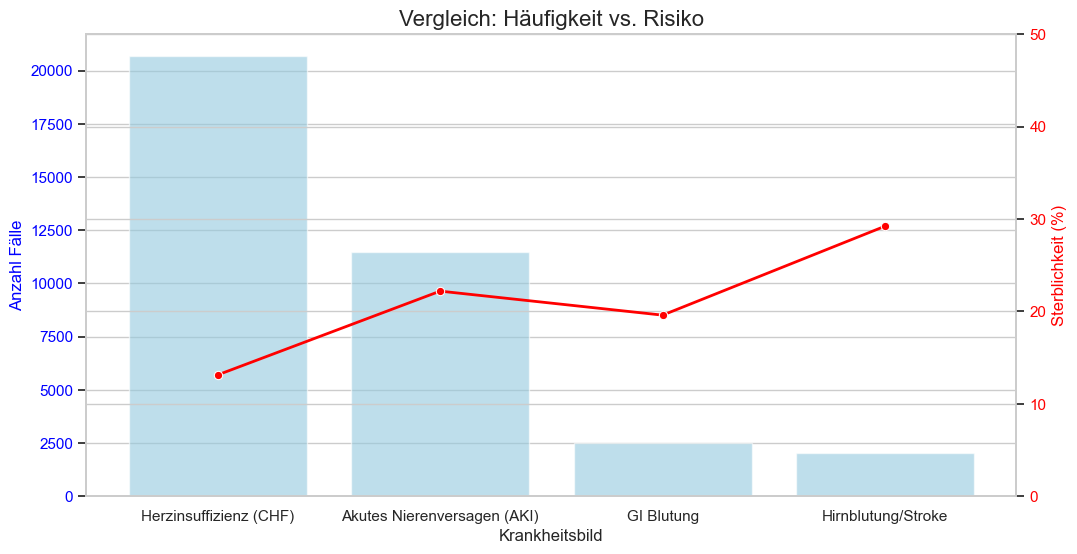

In [2]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from src.db_connect import load_sql

# Pfad-Hack
sys.path.append(os.path.abspath('..'))

print("Analysiere potenzielle Kohorten...")
df1 = load_sql('../sql/check_diseases.sql')

# Tabelle anzeigen
display(df1)

# Visualisierung: Anzahl vs. Sterblichkeit
fig, ax1 = plt.subplots(figsize=(12, 6))

# Balken für Anzahl (Links)
sns.barplot(data=df1, x='disease_group', y='num_patients', color='skyblue', ax=ax1, alpha=0.6)
ax1.set_ylabel('Anzahl Fälle', color='blue', fontsize=12)
ax1.set_xlabel('Krankheitsbild', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Linie für Sterblichkeit (Rechts)
ax2 = ax1.twinx()
sns.lineplot(data=df1, x='disease_group', y='mortality_rate_percent', color='red', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Sterblichkeit (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 50) # Skala 0 bis 50%

plt.title('Vergleich: Häufigkeit vs. Risiko', fontsize=16)
plt.show()